# Loading the dataset

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cleaned_combined_dataset.csv')

# Use only the relevant columns
df = df[['upvote_ratio', '2_way_label', 'score', 'num_comments', 'title']]

# Show first few rows
df.head()

,upvote_ratio,2_way_label,score,num_comments,title
0,0.72,1,25,4.0,My Xbox controller says hi
1,0.92,1,21,5.0,PsBattle: New image from The Mandalorian
2,NaN,0,10,NaN,Say hello to my little friend!
3,NaN,0,1,NaN,Watch your step little one
4,0.62,1,6,8.0,This tree I found with a solo cup on it


# Correlation Heatmap (Numerical Columns Only)

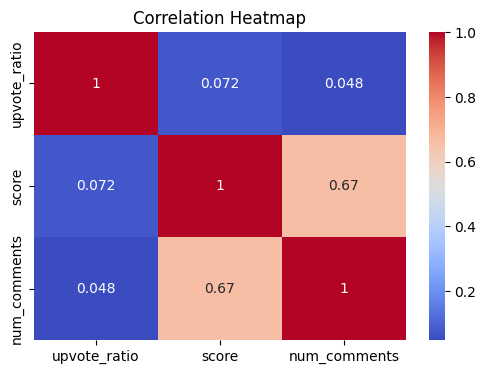

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (only numeric columns)
correlation = df[['upvote_ratio', 'score', 'num_comments']].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter Plot: Score vs Num_Comments coloured by Label

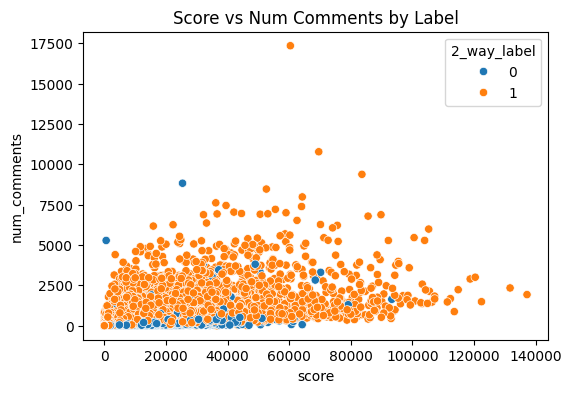

In [7]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='score', y='num_comments', hue='2_way_label')
plt.title('Score vs Num Comments by Label')
plt.show()

# Boxplot: Score Distribution by Label

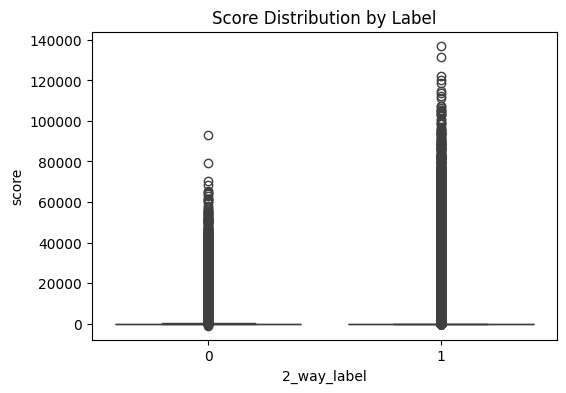

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='2_way_label', y='score')
plt.title('Score Distribution by Label')
plt.show()

# Bar Plot: Average Upvote Ratio by Label

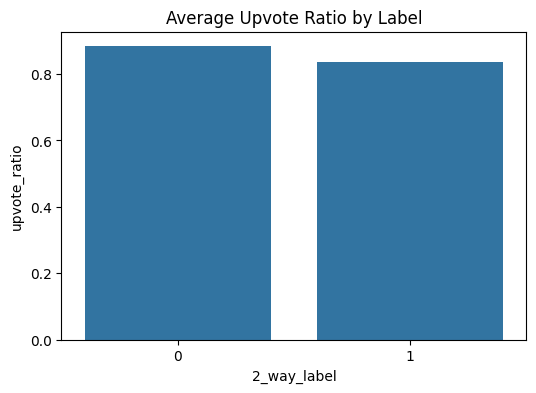

In [9]:
avg_upvote = df.groupby('2_way_label')['upvote_ratio'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=avg_upvote, x='2_way_label', y='upvote_ratio')
plt.title('Average Upvote Ratio by Label')
plt.show()

# Chi-Square Test: Association Between Label and Upvote Ratio Bucket

In [10]:
from scipy.stats import chi2_contingency
import numpy as np

# Create upvote ratio bins
df['upvote_bin'] = pd.cut(df['upvote_ratio'], bins=[0, 0.5, 0.75, 1], labels=['Low', 'Medium', 'High'])

# Contingency table
contingency = pd.crosstab(df['2_way_label'], df['upvote_bin'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-square value:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

# Show contingency table
contingency

Chi-square value: 14149.155689809126
p-value: 0.0
Degrees of freedom: 2


upvote_bin,Low,Medium,High
2_way_label,,,
0,7,42811,241128
1,6,129958,354757


# Word Cloud from Titles by Label

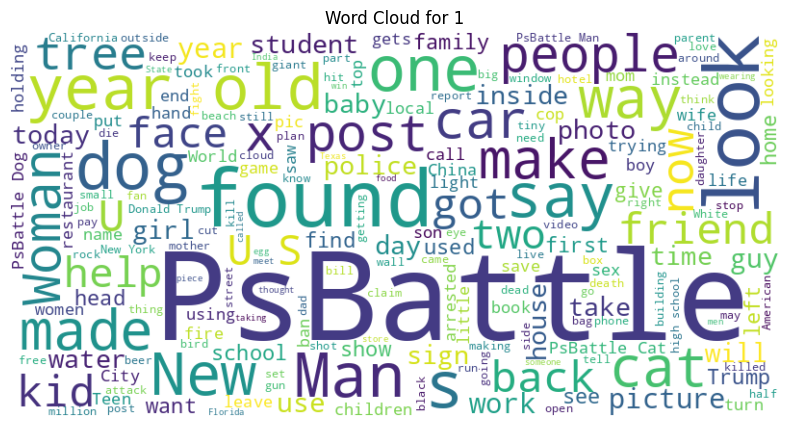

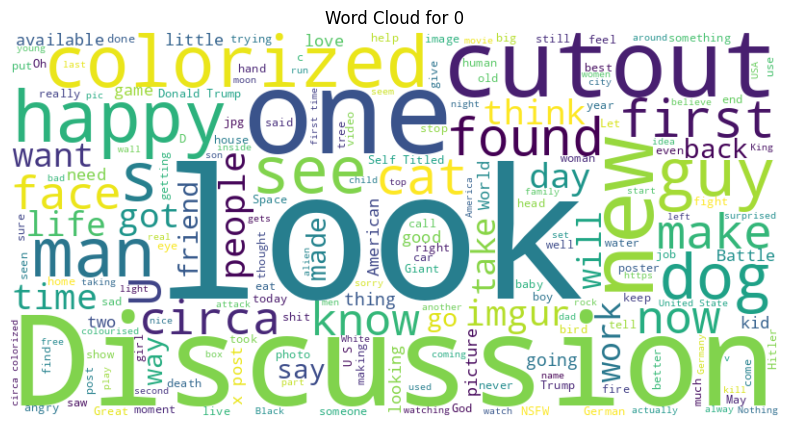

In [11]:
from wordcloud import WordCloud

# Plot word clouds for each label
for label in df['2_way_label'].unique():
    text = ' '.join(df[df['2_way_label'] == label]['title'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {label}')
    plt.show()